# Look at results of NODE training

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
paths = [
    "seed_1234_sample_rate_1_lr_0.1_n_epochs_200_hidden_dim_2_patience_50_log.pkl",
    "seed_1234_sample_rate_5_lr_0.1_n_epochs_200_hidden_dim_2_patience_50_log.pkl",
    "seed_1234_sample_rate_10_lr_0.1_n_epochs_200_hidden_dim_2_patience_50_log.pkl"
]

In [5]:
logs = []

for path in paths: 
    with open(path, 'rb') as file:
        logs.append(pickle.load(file))

In [12]:
def get_run_time(log):
    return np.sum(log["times"])

def get_stop_flag(log):
    return log["stopping_criteria"]

In [10]:
run_times = [get_run_time(log) for log in logs]

In [11]:
np.sum(run_times)/60

72.71438904205958

In [13]:
[get_stop_flag(log) for log in logs]

['max-epochs', 'early-stoppage', 'early-stoppage']

In [17]:
pat = logs[1]["patience_hist"]

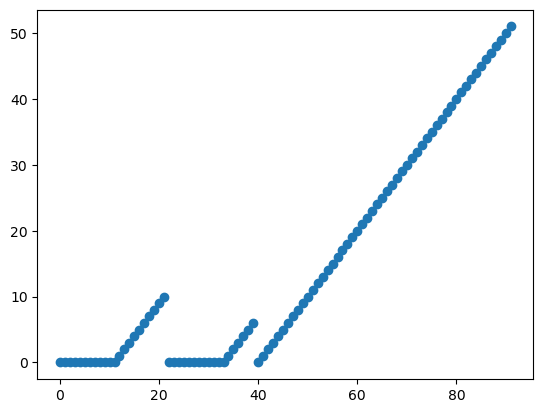

In [18]:
plt.scatter(np.arange(len(pat)),pat)
plt.show()

([<matplotlib.lines.Line2D at 0x2b553e538e90>],
 [0.033764518797397614,
  0.03470364212989807,
  0.03219924122095108,
  0.03182445466518402,
  0.031870074570178986],
 0.017710693180561066)

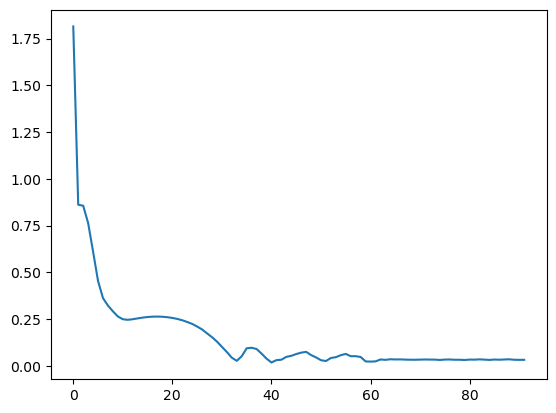

In [23]:
plt.plot(logs[1]['losses']), logs[1]['losses'][-5:], np.min(logs[1]["losses"])

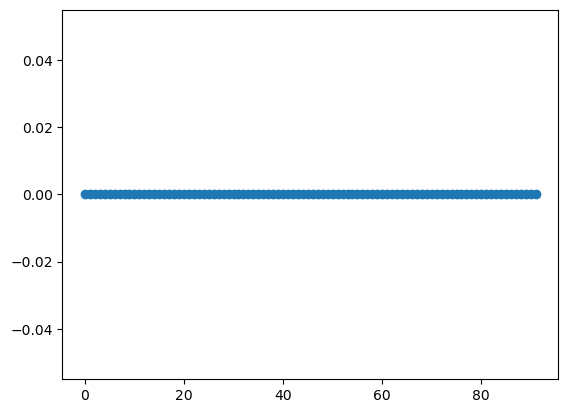

In [37]:
fails = logs[1]["method_failures"]
plt.scatter(np.arange(len(fails)), fails)
plt.show()

## Look at Learned $g$ compared to data